In [18]:
# ======= Import =======
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import numpy as np
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

In [19]:
apex_folder_path = r"E:\UET\HMI\Pj\Code\Output\Trich doan 3 (tran phuong vao chua) _ ok\apex_images"
results_path = r"E:\UET\HMI\Pj\Code\Output\Trich doan 3 (tran phuong vao chua) _ ok\emotion_results.csv"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
label_meanings = {
    0: 'Genuine Disgust',
    1: 'Posed Disgust',
    2: 'Genuine Happiness',
    3: 'Posed Happiness',
    4: 'Genuine Fear',
    5: 'Posed Fear',
    6: 'Genuine Anger',
    7: 'Posed Anger',
    8: 'Genuine Surprise',
    9: 'Posed Surprise',
    10: 'Genuine Sadness',
    11: 'Posed Sadness'
}
img_size = (224, 224)
num_classes = 12

In [20]:
df = pd.read_csv(results_path)
emotions = df['Emotion'].tolist()
apex_id = df['Apex Frame ID'].tolist()
person_id = df['Person ID'].tolist()
apex_img_paths = [os.path.join(apex_folder_path, f"person_{person_id[i]}_apex_frame_{apex_id[i]}.jpg") for i in range(len(apex_id))]

# VGG Face

In [21]:
# print version of keras
print("Keras version:", tf.keras.__version__)

Keras version: 3.11.1


In [22]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, classification_report
)

In [23]:
model_path = r"E:\UET\HMI\Model\vggface_16.keras"

In [24]:
X = []
y_true = []

for img_path, label in zip(apex_img_paths, emotions):
    if not os.path.exists(img_path):
        print(f"Không tìm thấy ảnh: {img_path}")
        continue

    img = cv2.imread(img_path)
    if img is None:
        print(f"Lỗi đọc ảnh: {img_path}")
        continue

    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0

    X.append(img)
    y_true.append(label)

X = np.array(X)
y_true = np.array(y_true)

In [25]:
# ======= Load Model =======
model = load_model(model_path)

In [29]:
y_pred_prob = model.predict(X, batch_size=32)
y_pred = np.argmax(y_pred_prob, axis=1)
y_labels = [label_meanings[int(label)] for label in y_pred]

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


In [34]:
accuracy = accuracy_score(y_true, y_labels)
f1_macro = f1_score(y_true, y_labels, average='macro')
f1_weighted = f1_score(y_true, y_labels, average='weighted')

print("\n===== Evaluation Results =====")
print(f"Accuracy:        {accuracy:.4f}")
print(f"F1 Score Macro:  {f1_macro:.4f}")
print(f"F1 Score Weighted: {f1_weighted:.4f}")



===== Evaluation Results =====
Accuracy:        0.0520
F1 Score Macro:  0.0519
F1 Score Weighted: 0.0421


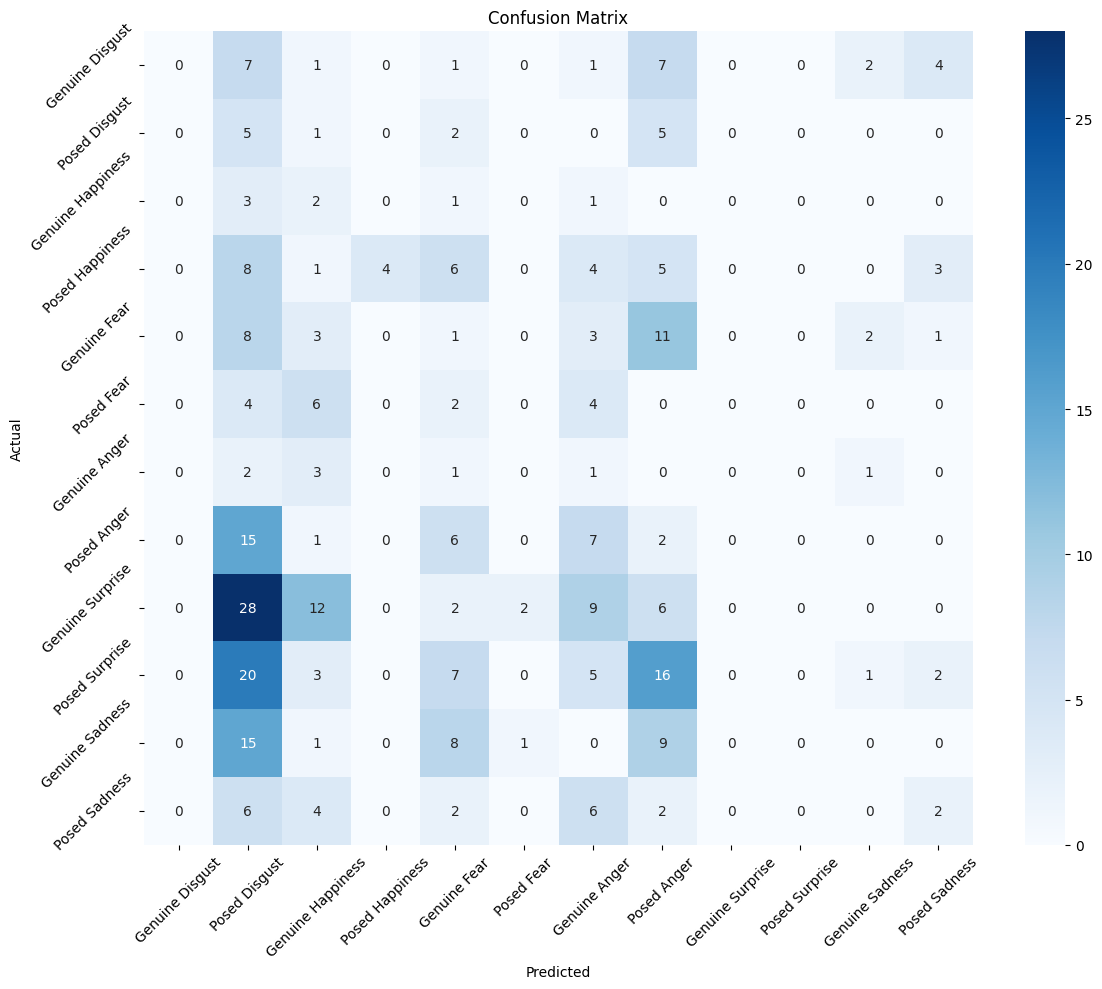

In [36]:
# ======== 7. Confusion Matrix ========
conf_matrix = confusion_matrix(y_true, y_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_meanings[i] for i in range(12)],
            yticklabels=[label_meanings[i] for i in range(12)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Alex Net

In [59]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [60]:
model_path = r"E:\UET\HMI\Model\alexnet_model.pth"

In [62]:
apex_imgs = [load_img(path, target_size=(224, 224)) for path in apex_img_paths]
apex_imgs = [img_to_array(img) for img in apex_imgs]

In [61]:
model = models.alexnet(pretrained=True)
model.classifier = nn.Sequential(
    nn.Linear(9216, 1024),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 12)
)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

c:\Users\Admin\anaconda3\envs\machine_learning\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\machine_learning\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, 

In [63]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [64]:
def preprocess_image(img_input):
    if isinstance(img_input, str):
        img = Image.open(img_input).convert('RGB')
    elif isinstance(img_input, np.ndarray):
        if img_input.dtype != np.uint8:
            img_input = (img_input * 255).astype(np.uint8)
        img = Image.fromarray(img_input).convert('RGB')
    else:
        raise ValueError("Input must be a file path or a numpy array.")
    return transform(img).unsqueeze(0)


===== Evaluation Results =====
Accuracy:        0.0642
F1 Score Macro:  0.0216
F1 Score Weighted: 0.0141


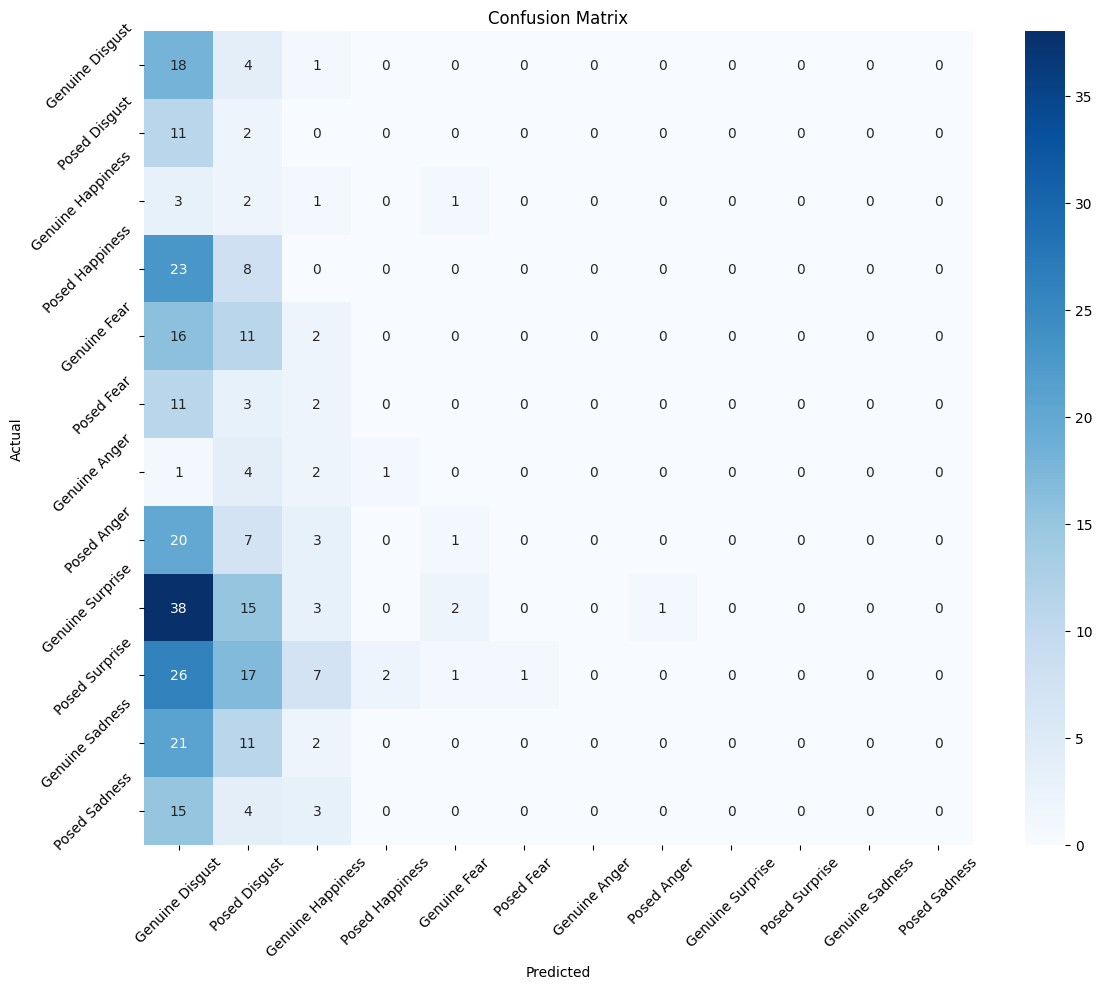

In [71]:
X  = torch.cat([preprocess_image(img) for img in apex_imgs], dim=0).to(device)
with torch.no_grad():
    y_pred_prob = model(X)
    y_pred = torch.argmax(y_pred_prob, dim=1)
y_labels = [label_meanings[int(label)] for label in y_pred.cpu().numpy()]
accuracy = accuracy_score(y_true, y_labels)
f1_macro = f1_score(y_true, y_labels, average='macro')
f1_weighted = f1_score(y_true, y_labels, average='weighted')
print("\n===== Evaluation Results =====")
print(f"Accuracy:        {accuracy:.4f}")
print(f"F1 Score Macro:  {f1_macro:.4f}")
print(f"F1 Score Weighted: {f1_weighted:.4f}")
# ======== 7. Confusion Matrix ========
conf_matrix = confusion_matrix(y_true, y_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_meanings[i] for i in range(12)],
            yticklabels=[label_meanings[i] for i in range(12)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Efficientnet_b2

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [73]:
model_path = r"E:\UET\HMI\Model\efficientnet_b2.keras"

In [75]:
model = load_model(model_path, custom_objects={"swish": tf.nn.swish})

TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 9.999999747378752e-05, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'categorical_crossentropy', 'loss_weights': None, 'metrics': ['accuracy'], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': True}}.

Exception encountered: Could not locate class 'FixedDropout'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'efficientnet.model', 'class_name': 'FixedDropout', 'config': {'name': 'block1b_drop', 'trainable': True, 'dtype': 'float32', 'rate': 0.0125, 'seed': None, 'noise_shape': [None, 1, 1, 1]}, 'registered_name': 'FixedDropout', 'build_config': {'input_shape': [None, 112, 112, 16]}, 'name': 'block1b_drop', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 16], 'dtype': 'float32', 'keras_history': ['block1b_project_bn', 0, 0]}}], 'kwargs': {'training': False}}]}

In [50]:
def preprocess_image(img_path):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Chuẩn hóa 0–1
    return img_array

# ==== CHUẨN BỊ DỮ LIỆU ====
X = []
y = []
for img_path, label in zip(apex_img_paths, emotions):
    if os.path.exists(img_path):
        try:
            X.append(preprocess_image(img_path))
            y.append(label)
        except Exception as e:
            print(f"[Lỗi] {img_path}: {e}")
    else:
        print(f"[Không tồn tại] {img_path}")

X = np.array(X)
y_true = np.array(y)


In [51]:
with tf.device(device):
    model = load_model(model_path)
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

ValueError: Expecting a string device name. Got <class 'torch.device'>(cpu)

In [ ]:
accuracy = accuracy_score(y_true, y_pred_classes)
f1_macro = f1_score(y_true, y_pred_classes, average='macro')
f1_weighted = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_meanings[i] for i in range(num_classes)],
            yticklabels=[label_meanings[i] for i in range(num_classes)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (EfficientNetB2)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Resnet_50

In [84]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D

In [77]:
X = []
y = []

for i, path in enumerate(apex_img_paths):
    if not os.path.exists(path):
        print(f"[Warning] File không tồn tại: {path}")
        continue
    try:
        img = load_img(path, target_size=img_size)
        img = img_to_array(img) / 255.0 
        X.append(img)
        y.append(emotions[i])
    except Exception as e:
        print(f"Lỗi khi load ảnh {path}: {e}")

X = np.array(X)
y = np.array(y)

In [78]:
model_path = r"E:\UET\HMI\Model\resnet_50.keras"

In [85]:
model_path = r"E:\UET\HMI\Model\resnet_50.keras"
try:
    model = load_model(model_path, custom_objects={
        'Flatten': Flatten,
        'GlobalAveragePooling2D': GlobalAveragePooling2D,
        'Dense': Dense
    })
except Exception as e:
    print(f"Lỗi khi tải mô hình: {e}")

Lỗi khi tải mô hình: Exception encountered when calling Flatten.call().

'list' object has no attribute 'shape'

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1891>'],)
  • kwargs=<class 'inspect._empty'>


In [55]:
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y

AttributeError: 'AlexNet' object has no attribute 'predict'

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_meanings[i] for i in range(12)],
            yticklabels=[label_meanings[i] for i in range(12)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ResNet50 Emotion Classification')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Densenet_201

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tqdm import tqdm

In [ ]:
model_path = r"E:\UET\HMI\Model\densenet_201.keras"

In [ ]:
img_size = (224, 224)
num_classes = 12

In [ ]:
X = []
y = []
for img_path, label in tqdm(zip(apex_img_paths, emotions), total=len(emotions)):
    if not os.path.exists(img_path):
        continue
    try:
        img = Image.open(img_path).convert("RGB")
        img = img.resize(img_size)
        img_array = np.array(img).astype(np.float32)
        img_array /= 255.0
        X.append(img_array)
        y.append(label)
    except Exception as e:
        print(f"Lỗi xử lý ảnh: {img_path} -> {e}")
X = np.array(X)
y = np.array(y)

y_true = y.astype(np.int32)

In [ ]:
model = load_model(model_path)

In [ ]:
y_pred_prob = model.predict(X, batch_size=32)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

acc = accuracy_score(y_true, y_pred_classes)
f1_macro = f1_score(y_true, y_pred_classes, average='macro')
f1_weighted = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()